# Exploratory Data Analysis (EDA)

This project will guide you through analysing sales data. This project seeks to identify and clean anomalies, create visualisations, and reflect on your findings. 

### Dataset Context
The dataset contains sales data for an online store, including:
- **order_date**: Date of the transaction.
- **product_category**: Category of the product sold.
- **sales_amount**: Revenue generated from the sale (contains missing values and outliers).
- **quantity**: Number of items sold.
- **customer_region**: Region of the customer.

### Load and Inspect the Data
1. Load the dataset into a Pandas DataFrame.
2. Inspect the first few rows of the dataset.
3. Generate summary statistics.

In [ ]:
### Task 1: Load and Inspect the Data

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/sales_data.csv') 

# Inspect the first few rows
print("First Few Rows of the Dataset:")
print(df.head())  

# Generate summary statistics
print("\nSummary Statistics:")
print(df.describe())

First Few Rows of the Dataset:
   order_date product_category  sales_amount  quantity customer_region
0  2023-01-01      Electronics        1000.0         1           North
1  2023-01-02         Clothing           5.0         2           South
2  2023-01-03            Books           NaN         1            East
3  2023-01-04             Home         250.0         3            West
4  2023-01-05             Toys         300.0         2           North

Summary Statistics:
       sales_amount   quantity
count     20.000000  21.000000
mean     277.750000   1.761905
std      260.022646   0.768424
min        5.000000   1.000000
25%      150.000000   1.000000
50%      225.000000   2.000000
75%      300.000000   2.000000
max     1000.000000   3.000000


###  Identify Anomalies

1. Check for missing values.
2. Check for duplicate rows.

In [ ]:
### Task 2: Identify Anomalies

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())  

# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum()) 


Missing Values:
order_date          0
product_category    0
sales_amount        1
quantity            0
customer_region     0
dtype: int64
Duplicate Rows: 1


### Data Cleaning

In [ ]:
### Task 3: Data Cleaning

# Fill missing values in sales_amount with the median
df['sales_amount'] = df['sales_amount'].fillna(df['sales_amount'].median()) 

# Remove duplicate rows
df.drop_duplicates()  

# Handle outliers in sales_amount using IQR
Q1 = df['sales_amount'].quantile(0.25)
Q3 = df['sales_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

# TODO: Filter the dataset to remove outliers
df = df[(df['sales_amount'] >= lower_bound) & (df['sales_amount'] <= upper_bound)]

# Verify the cleaned data
print("\nCleaned Dataset:")
print(df)


Cleaned Dataset:
    order_date product_category  sales_amount  quantity customer_region
1   2023-01-02         Clothing           5.0         2           South
2   2023-01-03            Books         225.0         1            East
3   2023-01-04             Home         250.0         3            West
4   2023-01-05             Toys         300.0         2           North
5   2023-01-06      Electronics         100.0         1           North
6   2023-01-07         Clothing         200.0         2           South
7   2023-01-08            Books         150.0         1            East
8   2023-01-09             Home         250.0         3            West
9   2023-01-10             Toys         300.0         2           North
10  2023-01-11      Electronics         100.0         1           North
11  2023-01-12         Clothing         200.0         2           South
12  2023-01-13            Books         150.0         1            East
13  2023-01-14             Home         250.0 

### Task 4: Visual Exploration
1. Create a histogram to show the distribution of sales amounts across all transactions.
2. Create a bar plot to show the average sales amount by quantity.

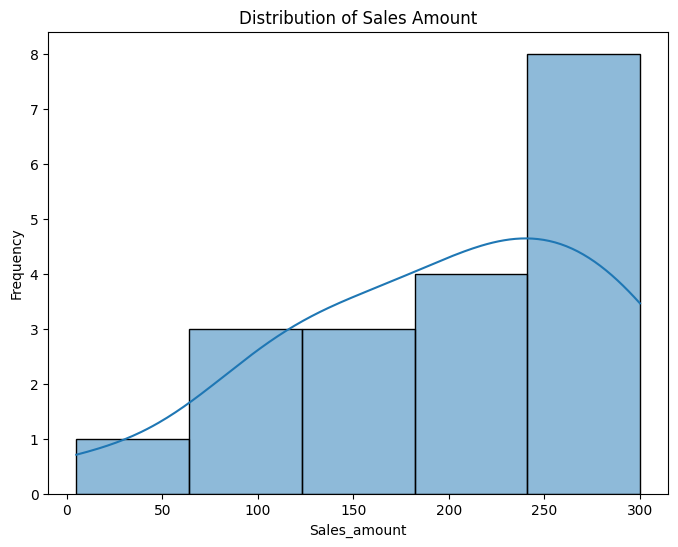

In [ ]:
### Task 4: Visual Exploration

# Create a histogram for sales_amount
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['sales_amount'], bins=5, kde=True)  
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales_amount') 
plt.ylabel('Frequency')
plt.show()

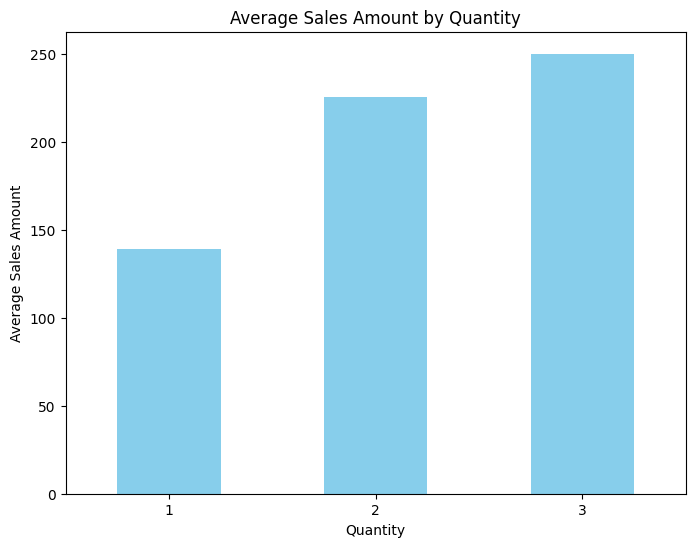

In [ ]:
# Create a Bar plot for average sales_amount by quantity
average_sales = df.groupby('quantity')['sales_amount'].mean()  

plt.figure(figsize=(8, 6))
average_sales.plot(kind='bar', color='skyblue')
plt.title('Average Sales Amount by Quantity')
plt.xlabel('Quantity') 
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=0)
plt.show()


### Feature Engineering
1. Create a new column called `sales_per_unit` to represent the average sales amount per unit sold.
This column can help us interpret the data by providing insights into pricing strategies and product value.

In [ ]:
### Task 5: Feature Engineering

# Create a new column 'sales_per_unit' by dividing sales_amount by quantity
# This column represents the average sales amount per unit sold.
df['sales_per_unit'] = df['sales_amount'] / df['quantity'] 

# Aggregate the new column 'sales_per_unit_' by product_category
category_aggregation = df.groupby('product_category')['sales_per_unit'].mean() 

#  Display the results
print("Average Sales Per Unit by Product Category:")
print(category_aggregation)


Average Sales Per Unit by Product Category:
product_category
Books          168.750000
Clothing        75.625000
Electronics    100.000000
Home            83.333333
Toys           150.000000
Name: sales_per_unit, dtype: float64


###  Actionable Insights
Provide your responses below.

Insights from the sales data for the online company:
1. From the histogram, whcich is skewed to the right shows that most of the sales fall between the 250-300
and low frequency for sales between 0-50 indicating that high-priced products are in demand.
2.From the bar chart, we can also see the highest average sales for the highest quantity, indicating , higher 
quanity sold leads to high average sales.

Recommendations:
1. Promote bulk purchases for high priced products.
2. Target regions with high sales
3. Investigate the low outlier of 5 sales amount to identify the problem.

#### Identifying Key Price Ranges
- Look at the histogram for `sales_amount` in `Task 4`. Which range of sales amounts has the highest frequency?
- How might the business use this information to shape its promotions or pricing strategy?


1.250 to 300 sales amount has the highest frequency.
2. Promote the sales of products in this Category ( discounts will greatly increase the sales)

####  Maximising Profitability Through Quantity
- Based on the bar plot in `Task 4` showing average sales amounts by quantity, which quantity level has the highest average sales amount?
- How could the business encourage customers to buy more items per transaction? 

1. The 3 quantity has the highest average sales amount.
2. The business can encourage customers to buy more by given discounts.

#### Leveraging High-Value Categories
- Look at the aggregated `sales_per_unit` values by product_category in `Task 5`. Which category has the highest average sales per unit?
- How could the business focus on this category to maximise revenue?

1. The books category has the highest average sales per unit.
2. The business should focus more on promoting sales of books, by introducing more selection and given discounts

#### Integrating Insights: Visual and Non-Visual Analysis
- How did visual analysis reinforce or clarify trends observed in the non-visual analysis?

The visual analysis made it easier to depict the highs and lows of the charts and data.